In [1]:
import pandas as pd
import numpy as np
from numpy import array,asarray,zeros

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix

In [3]:
from keras.utils.np_utils import to_categorical 
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras import Sequential
from keras.layers import Embedding,LSTM
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Embedding

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

import requests
from io import StringIO

In [4]:
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
movie = pd.read_csv("drive/MyDrive/IMDBDataset/IMDB Dataset.csv")

In [7]:
movie.head(25)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [8]:
movie.tail(25)

,review,sentiment
49975,90 minutes of Mindy...Mindy is a tease to boyf...,negative
49976,"I saw the movie in the theater at its release,...",positive
49977,"Dog Bite Dog isn't going to be for everyone, b...",positive
49978,Halloween is one of those movies that gets you...,positive
49979,"I saw this with high expectations. Come on, it...",negative
49980,A stunning film of high quality.<br /><br />Ap...,positive
49981,"And I repeat, please do not see this movie! Th...",negative
49982,"To be hones, I used to like this show and watc...",negative
49983,"I loved it, having been a fan of the original ...",positive
49984,Hello it is I Derrick Cannon and I welcome you...,negative


In [9]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
movie.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [11]:
movie.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [12]:
movie.shape

(50000, 2)

In [13]:
#sentiment count
movie['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

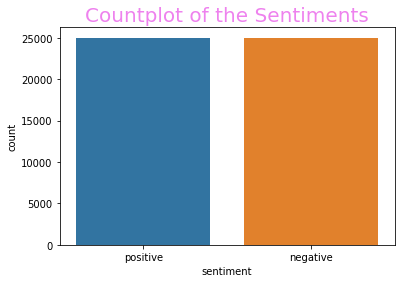

In [14]:
sns.countplot(movie.sentiment)
plt.title('Countplot of the Sentiments', fontsize = 20, color = 'Violet')
plt.show()

In [15]:
# Here we create a function to clean the text data
# we will use regular expressions here alot since our data dtype is string/text.

def cleaning(data):
  
  # removing tags
  phrase = remove_tags(data)
  
  # remove special characters i.e r
  # remove anything thats not a to z or A-Z
  
  phrase = re.sub('[^a-zA-Z]', ' ', phrase)
  
  # remove multiple spaces
  phrase = re.sub(r'\s+', ' ',phrase)
  
  return phrase

In [16]:
TAG_RE = re.compile(r'<[^>]+>')


def remove_tags(text):
  return TAG_RE.sub('', text)

In [17]:
X = []
phrases = list(movie['review'])
for data in phrases:
  X.append(cleaning(data))

In [18]:
X[34]

'I watched this film not really expecting much I got it in a pack of films all of which were pretty terrible in their own way for under a fiver so what could I expect and you know what I was right they were all terrible this movie has a few and a few is stretching it interesting points the occasional camcorder view is a nice touch the drummer is very like a drummer i e damned annoying and well thats about it actually the problem is that its just so boring in what I can only assume was an attempt to build tension a whole lot of nothing happens and when it does its utterly tedious I had my thumb on the fast forward button ready to press for most of the movie but gave it a go and seriously is the lead singer of the band that great looking coz they don t half mention how beautiful he is a hell of a lot I thought he looked a bit like a meercat all this and I haven t even mentioned the killer I m not even gonna go into it its just not worth explaining Anyway as far as I m concerned Star and 

In [19]:
train_reviews=movie.review[:40000]
train_sentiments=movie.sentiment[:40000]

#test dataset
test_reviews=movie.review[40000:]
test_sentiments=movie.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [20]:
y = movie['sentiment']

y = np.array(list(map(lambda x: 1 if x=='positive' else 0,y)))

In [21]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
from bs4 import BeautifulSoup
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
movie['review']=movie['review'].apply(denoise_text)

#function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
movie['review']=movie['review'].apply(remove_special_characters)

In [25]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
movie['review']=movie['review'].apply(remove_special_characters)

In [26]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
movie['review']=movie['review'].apply(simple_stemmer)

In [27]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
movie['review']=movie['review'].apply(remove_stopwords)


{'does', 'my', 'can', "weren't", "wouldn't", 'but', 'been', 'other', 'where', 'we', 'weren', 'now', 'ourselves', 'are', 'our', 'between', 'off', 've', 'mustn', "she's", 'again', 'isn', 'before', 'each', 'shouldn', 'ma', 'you', 'yourselves', 'once', "mustn't", "haven't", 'yours', 'to', 'm', 'that', 'at', 'further', 'until', 'd', 'the', "shouldn't", "you've", 'she', 'out', 'who', "doesn't", 'will', 'during', 'there', 'couldn', 'be', 'both', "mightn't", 'what', 'below', 'down', 'these', 'more', 'itself', 'aren', 'with', 'wasn', "couldn't", 'yourself', 'few', 'of', 'myself', "that'll", 'after', "needn't", 'as', 're', 'your', "shan't", 'them', "you'd", 'because', 'hadn', 'he', 'herself', 'those', 'an', 'under', 'such', 'doesn', 's', 'their', 'him', 'hasn', 'in', "it's", "should've", 'no', 'they', 'or', "aren't", 'don', 'just', 'o', 'same', 'needn', 'when', 'shan', 'a', "hasn't", 'themselves', 'over', 'll', 'do', "wasn't", 'is', 'most', 'and', 'here', 'did', 'why', 'all', 'nor', 'so', 'some'

In [28]:
#normalized train reviews
norm_train_reviews=movie.review[:40000]
norm_train_reviews[100]

'thi short film inspir soontob full length featur spatula mad hilari piec contend similar cartoon yield multipl writer short film star edward spatula fire hi job join fight evil spoon thi premis allow funni content near begin bare present remaind featur thi film 15minut run time absorb oddbal comedi small music number unfortun much els lie plot set doesnt realli time show sure follow plot better mani highbudget hollywood film thi film worth watch least time take dont expect deep stori'

In [29]:
#Normalized test reviews
norm_test_reviews=movie.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

In [30]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 6209089)
BOW_cv_test: (10000, 6209089)


In [31]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6209089)
Tfidf_test: (10000, 6209089)


In [32]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(movie['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [33]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [34]:
train_reviews

0        one review ha mention watch 1 oz episod youll ...
1        wonder littl product film techniqu veri unassu...
2        thought thi wa wonder way spend time hot summe...
3        basic famili littl boy jake think zombi hi clo...
4        petter mattei love time money visual stun film...
                               ...                        
39995    thi wa marvel funni comedi great cast john rit...
39996    plot central charact move camera closeup fact ...
39997    thi show awesom love actor ha great stori line...
39998    fact thi movi ha entitl success movi switzerla...
39999    confess sever disappointedthi version way comp...
Name: review, Length: 40000, dtype: object

In [35]:
test_reviews

40000    first want say lean liber polit scale found mo...
40001    wa excit see sitcom would hope repres indian c...
40002    look cover read stuff entir differ type movi c...
40003    like mani count appear denni hopper make thi c...
40004    thi movi wa tv day didnt enjoy first georg jun...
                               ...                        
49995    thought thi movi right good job wasnt creativ ...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    im go disagre previou comment side maltin thi ...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 10000, dtype: object

In [36]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)

MultinomialNB()


In [37]:
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()


In [38]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [39]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.751
mnb_tfidf_score : 0.7509


In [40]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [41]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3736 1271]
 [1219 3774]]
[[3729 1278]
 [1213 3780]]


In [42]:
# The tokenizer module creates a word to index dictionary.
# Each word is used as key while the corresponding unique index,
# is used as the value for the key.

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [43]:
# Assessing the length of sentences in the reviews

lengths = [len(i) for i in X_train+X_test]

print(f'Max length of sentence: {max(lengths)}')
print(f'Average length of sentence: {np.mean(lengths)}')

Max length of sentence: 2117
Average length of sentence: 212.34318


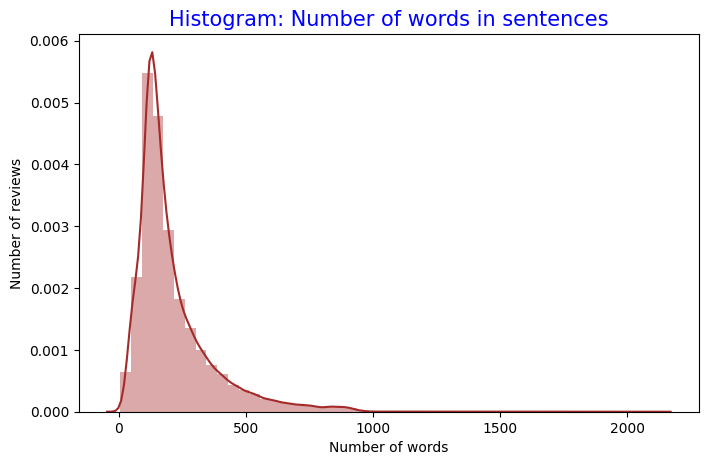

In [44]:
# Using seaborn to plot the sentence length
# specifying the figure size
# Labeling the title, x axis and y axis
# Displaying the chart

plt.figure(figsize = (8,5), dpi = 100)
sns.distplot(lengths, color = 'brown')
plt.title('Histogram: Number of words in sentences', fontsize = 15, color = 'Blue')
plt.ylabel('Number of reviews')
plt.xlabel('Number of words')
plt.show()


In [45]:
# We will set a maximum size of each list to 100
# The lists with > 100 will truncated.
# Lists with < 100 will be added 0 till the maximum length.
# This process is called padding

# The code below will find the vocabulary size and then perfom Padding 
# on both X_train and X_test

# tokenizer.word_index

vocab_size  = len(tokenizer.word_index)+ 1

maxlength = 100

X_train = pad_sequences(X_train, padding="post", maxlen=maxlength)
X_test = pad_sequences(X_test, padding="post", maxlen=maxlength)

In [46]:
len(X_train[2])

100

In [47]:
vocab_size

92547

In [48]:
embedding_dictionary = dict()

glove_file = open('drive/MyDrive/IMDBDataset/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
  record = line.split()
  word = record[0]
  dimensions = asarray(record [1:], dtype="float32")
  embedding_dictionary [word] = dimensions
glove_file.close()

In [49]:
embedding_matrix  = zeros((vocab_size, 100))

for word, index in tokenizer.word_index.items():
  
  embedding_vector = embedding_dictionary.get(word)
  
  if embedding_vector  is not None:
    
    embedding_matrix[index] = embedding_vector

In [50]:
embedding_vector

array([ 0.99882  ,  0.044    ,  0.58508  ,  0.96     ,  0.098084 ,
       -0.0022934, -0.1695   ,  1.1139   , -0.15384  ,  0.802    ,
        1.347    ,  0.35911  , -0.63915  , -1.2736   , -0.69913  ,
       -0.2875   ,  0.38705  , -0.11684  ,  0.31795  , -1.5145   ,
        0.5244   , -0.77148  ,  0.2228   , -0.22528  ,  0.37621  ,
       -0.19916  ,  0.40378  , -0.87357  , -0.29921  , -0.26723  ,
        0.42806  , -0.59294  ,  0.422    ,  0.22028  , -0.0070494,
        0.63873  ,  0.7914   ,  0.40717  ,  0.23863  , -0.24061  ,
        0.31657  ,  0.021292 , -0.3244   , -0.70151  ,  0.33481  ,
        0.24906  , -0.37085  , -0.27512  ,  0.080021 ,  0.71951  ,
       -0.36113  ,  0.035023 ,  0.24478  , -1.0278   , -0.23183  ,
       -0.42703  , -0.26383  ,  0.44428  ,  0.5014   ,  0.061515 ,
       -0.42084  ,  0.43479  ,  0.51835  , -0.20161  , -0.47988  ,
       -0.22617  ,  1.1975   , -0.27753  ,  1.2086   ,  1.0786   ,
       -0.41692  ,  0.81516  , -1.3145   , -0.48762  , -0.4449

In [51]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37771001,  0.22946   , -0.30311   , ..., -0.33610001,
         0.02637   , -0.72302002],
       [ 0.99882001,  0.044     ,  0.58508003, ..., -0.54869002,
         0.15141   ,  1.36880004]])

In [52]:
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import MaxPooling1D,GlobalAveragePooling1D,Conv1D,LSTM

In [53]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlength , trainable=False)
model.add(embedding_layer)
model.add(Conv1D(64, 3, activation="relu"))
model.add(Conv1D(32, 3, activation="relu"))
model.add(MaxPooling1D(3))
model.add(Conv1D(16, 3, activation="relu"))
model.add(Conv1D(8, 3, activation="relu"))
model.add(GlobalAveragePooling1D())
model.add(Dense(1,  activation="sigmoid"))   

'''
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))'''


"\nmodel.add(Conv1D(128, 5, activation='relu'))\nmodel.add(GlobalMaxPooling1D())\nmodel.add(Dropout(0.2)),\nmodel.add(Dense(1, activation='sigmoid'))"

In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [55]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9254700   
                                                                 
 conv1d (Conv1D)             (None, 98, 64)            19264     
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 32)            6176      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 32, 32)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 30, 16)            1552      
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 8)             392       
                                                        

In [56]:
history = model.fit(X_train, y_train, batch_size=128, epochs=1, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.4919 - acc: 0.7663


In [57]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/20
250/250 [==============================] - 1s 5ms/step - loss: 0.4660 - acc: 0.7800 - val_loss: 0.4388 - val_acc: 0.8010
Epoch 2/20
250/250 [==============================] - 1s 5ms/step - loss: 0.4298 - acc: 0.7993 - val_loss: 0.4122 - val_acc: 0.8129
Epoch 3/20
250/250 [==============================] - 1s 5ms/step - loss: 0.4062 - acc: 0.8137 - val_loss: 0.3997 - val_acc: 0.8195
Epoch 4/20
250/250 [==============================] - 1s 5ms/step - loss: 0.3925 - acc: 0.8207 - val_loss: 0.3881 - val_acc: 0.8235
Epoch 5/20
250/250 [==============================] - 1s 5ms/step - loss: 0.3717 - acc: 0.8345 - val_loss: 0.3910 - val_acc: 0.8244
Epoch 6/20
250/250 [==============================] - 1s 5ms/step - loss: 0.3614 - acc: 0.8367 - val_loss: 0.3891 - val_acc: 0.8216
Epoch 7/20
250/250 [==============================] - 2s 8ms/step - loss: 0.3491 - acc: 0.8436 - val_loss: 0.3801 - val_acc: 0.8284
Epoch 8/20
250/250 [==============================] - 2s 9ms/step - loss: 0.

In [58]:
#y_pred = model.predict_classes(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

y_pred

# printing the classifica

print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      4961
           1       0.80      0.88      0.84      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [59]:
score

[0.43746820092201233, 0.8292999863624573]

In [60]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.43746820092201233
Test Accuracy: 0.8292999863624573


<function matplotlib.pyplot.show(*args, **kw)>

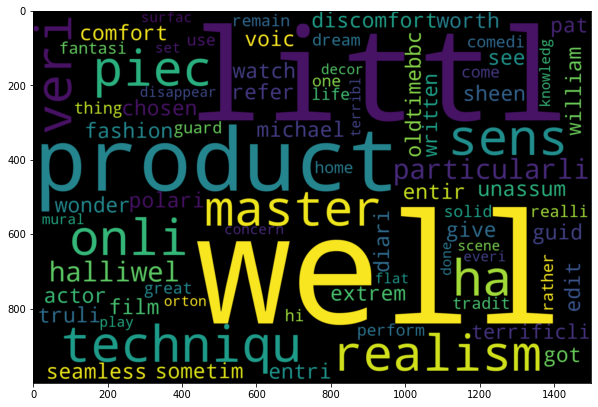

In [61]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1500,height=1000,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

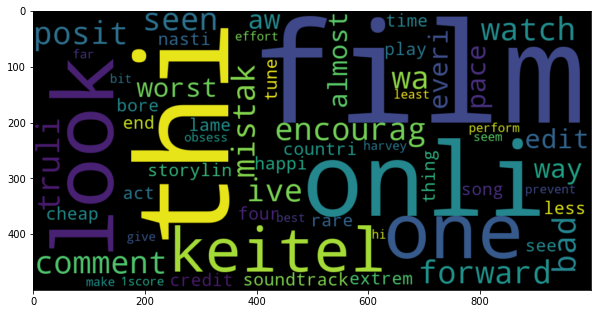

In [62]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show


In [63]:
# Creating a random review generator
# Creating a variable for the randomly generated movie review
# printing the random review

index = np.random.randint(X_train.shape[0])

s_instance = X[index]

print(s_instance)


It was by accident that I was scanning the TV channels and found this wonderful film about two beautiful human beings who become attracted to each other in a very innocent and virgin like approach to each other Ethan Hawke Jesse Tape and Julie Delpy Celine ER TV Series Nicole This gal and guy will warm your very heart and soul and make you think deeply into your past relationships and how you really wish you had followed your hearts strings with a guy or gal you deep down loved and lost track of over the years Jesse and Celine have great conversation and deep eye contact with a great magnetic explosion between the two of them I am looking forward to the SEQUEL to this film in and if you have viewed this film you will feel the same way 


In [64]:
# Here we want to predict the random review as either poitive or negative using the created model
# So, the review will be preprocessed similarly to what we did in the dataset before training i.e,
# the words will be converted to integers and the fitted to a maximum length of 100.
# The empty list will store the values.
# Then we create a for loop to iterate through the list 
#

s_instance = tokenizer.texts_to_sequences(s_instance)

flat_list = []

for sublist in s_instance:
  for item in sublist:
    flat_list.append(item)
    
flat_list = [flat_list]

s_instance = pad_sequences(flat_list, padding = 'post', maxlen = maxlength)

model.predict(s_instance)

1/1 [==============================] - 0s 111ms/step


array([[0.9845748]], dtype=float32)

In [65]:
# Building the model 
# Create an embedding layer by specifying the parameters we created earlier
# Creating two Recurrent neural network layers
# Here we will use two LTSM (Long Term Short Term Memory) layers
# Bidirectional means the RNN processes sequence from start to end,and also backwards
# This makes the model perform better.
# We added another hidden layer and included an activation function as relu.
# Here we added Dropout to prevent the model from over fitting
# Dropout randomly removes some neurons in the hidden layers
# At the end we add a dense layer with sigmoid activation function.

model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100,
                              weights=[embedding_matrix], 
                              input_length=maxlength, trainable=False),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, dropout=0.3, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, dropout=0.3, return_sequences = True)),
    tf.keras.layers.Conv1D(100, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(16, activation='relu'),        
    tf.keras.layers.Dense(1, activation='sigmoid')])


In [66]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [67]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 200)         160800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 200)         240800    
 nal)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 96, 100)           100100    
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                      

In [68]:
history = model1.fit(X_train, y_train, epochs= 10,
                    batch_size = 128, verbose = 1,
                   validation_split = 0.2)

Epoch 1/20
250/250 [==============================] - 18s 45ms/step - loss: 0.5591 - acc: 0.6903 - val_loss: 0.5077 - val_acc: 0.7541
Epoch 2/20
250/250 [==============================] - 10s 39ms/step - loss: 0.4473 - acc: 0.7876 - val_loss: 0.3998 - val_acc: 0.8191
Epoch 3/20
250/250 [==============================] - 10s 39ms/step - loss: 0.4059 - acc: 0.8152 - val_loss: 0.3632 - val_acc: 0.8382
Epoch 4/20
250/250 [==============================] - 10s 39ms/step - loss: 0.3833 - acc: 0.8257 - val_loss: 0.3507 - val_acc: 0.8378
Epoch 5/20
250/250 [==============================] - 10s 39ms/step - loss: 0.3673 - acc: 0.8359 - val_loss: 0.3438 - val_acc: 0.8469
Epoch 6/20
250/250 [==============================] - 10s 38ms/step - loss: 0.3492 - acc: 0.8444 - val_loss: 0.3567 - val_acc: 0.8379
Epoch 7/20
250/250 [==============================] - 10s 38ms/step - loss: 0.3344 - acc: 0.8523 - val_loss: 0.3292 - val_acc: 0.8539
Epoch 8/20
250/250 [==============================] - 10s 38ms

In [69]:
score = model1.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 3s 10ms/step - loss: 0.3578 - acc: 0.8700


In [70]:
#y_pred = model.predict_classes(X_test)
y_pred = (model1.predict(X_test) > 0.5).astype("int32")

y_pred

# printing the classification

print(classification_report(y_test, y_pred))

313/313 [==============================] - 4s 8ms/step
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [71]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.35779961943626404
Test Accuracy: 0.8700000047683716


In [72]:
movie.to_csv('drive/MyDrive/IMDBDataset/movies.csv')

In [73]:
from sklearn.metrics import roc_auc_score

In [74]:
auc = roc_auc_score(y_test, y_pred)

In [75]:
auc

0.869921886047547